# Explore here

In [ ]:
# Your code here

import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
#con esto vemos las primeras lineas del dataframe para ver si se importaron de manera correcta
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.to_csv('../data/raw/df_raw.csv', index=False)

Escogemos como variable el precio
vamos a hacer el analisis de sobre el precio de una propiedad de AIRBNB en NY city

Eliminar duplicados

In [ ]:
df['id'].duplicated().sum()


np.int64(0)

esto nos indica que no hay ningun id duplicado, todas tienen un ID distintos, esto nos asegura que no hay duplicados

Paso#2 liminamos columanas irrelevantes que no afectan al precio

In [6]:
df.drop(['id','name','host_name','last_review','reviews_per_month'], axis=1, inplace=True)

Aqui eliminamos columanas irrelevantes y las justificacion es la sioguientes

review per month tiene mucho valores que le faltan

In [ ]:
df.head()
#esto es para revisar como quedo el DF

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Paso #3 Analisis de variables univariantes

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Analisis de las variables categorias
	Histogramas 


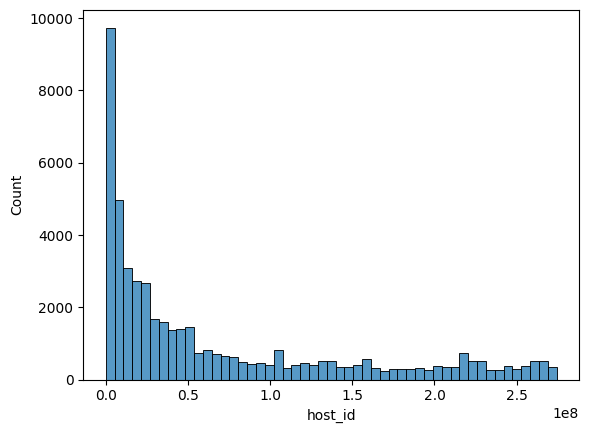

In [11]:
sns.histplot(data=df,x='host_id')
plt.show()

Todas las variables categoricas en un solo grafico

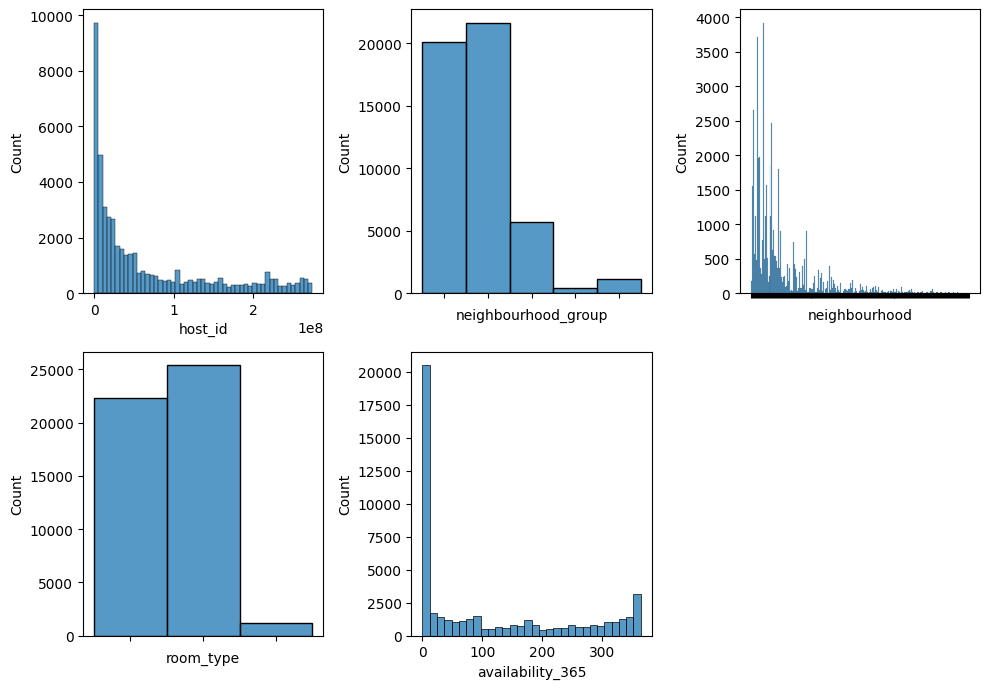

In [19]:
fig, axis = plt.subplots(2,3, figsize=(10,7))
sns.histplot(ax=axis[0,0],data=df,x='host_id')
sns.histplot(ax=axis[0,1],data=df,x='neighbourhood_group').set_xticklabels([])
sns.histplot(ax=axis[0,2],data=df,x='neighbourhood').set_xticklabels([])
sns.histplot(ax=axis[1,0],data=df,x='room_type').set_xticklabels([])
sns.histplot(ax=axis[1,1],data=df,x='availability_365')
fig.delaxes(axis[1,2])
plt.tight_layout()
plt.show()

Aqui comenzamos a entender los datos y podemos comenzar a entender como estan organizdos, algunas hipotesis iniciales y insights del scarpping, por ejemplo con el availabilty, hay una gran cantidad de apartamentos que estan en availability en 0, esto no tiene mucho sentido and it raises some awarenes, ya sabesmos que debemos investigar eso a profundidad 

Analisis de las variables numericas
	Histograma y diagrama de cajas

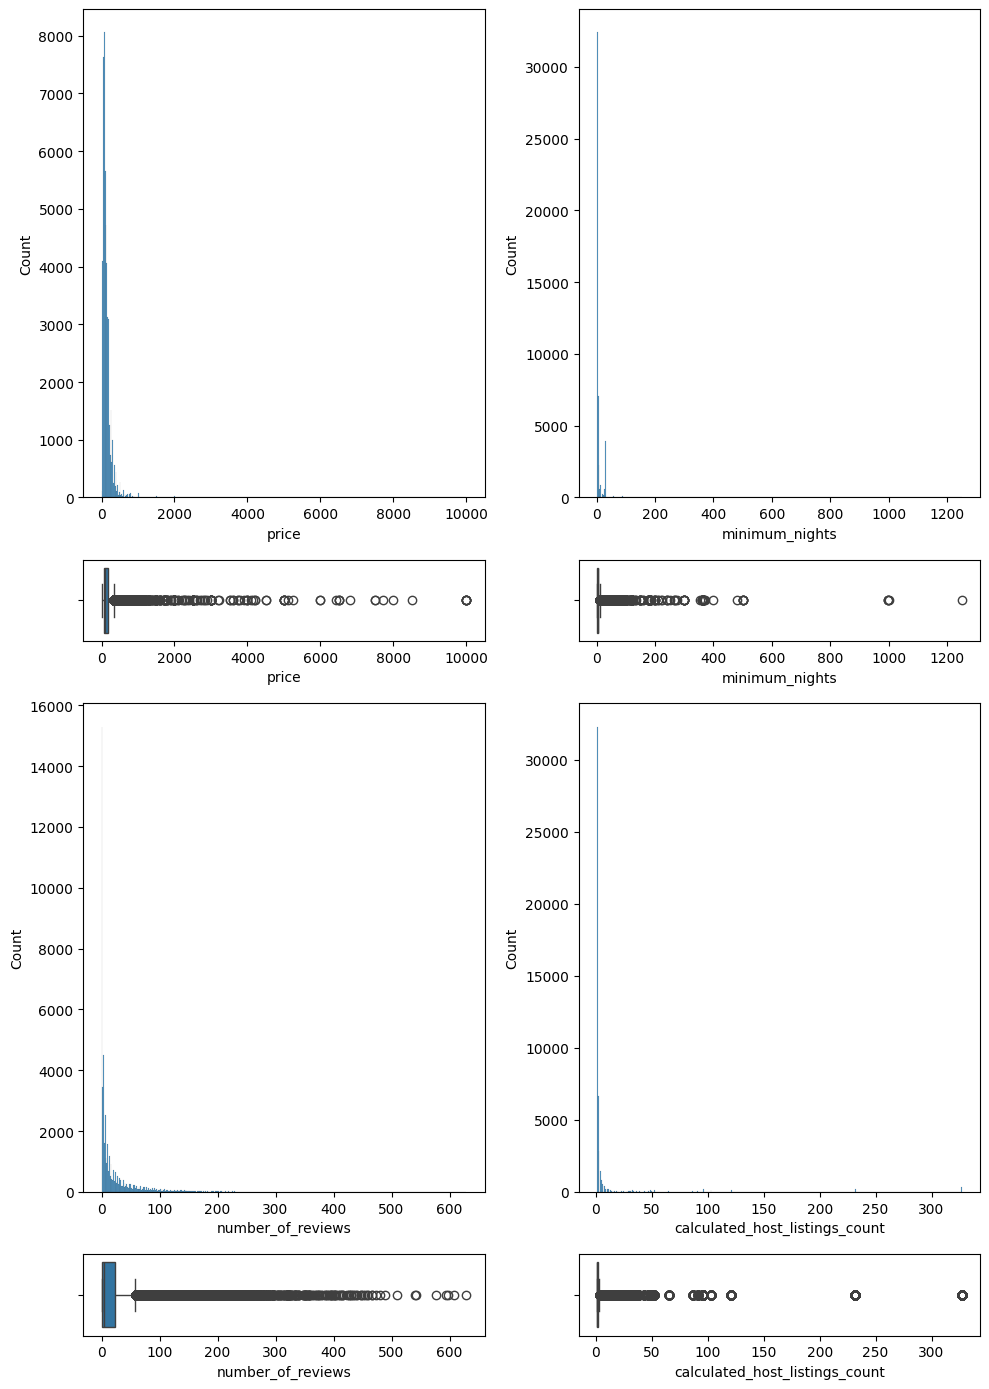

In [ ]:
fig, axis = plt.subplots(4,2, figsize=(10,14), gridspec_kw={'height_ratios': [6, 1, 6, 1]})
sns.histplot(ax=axis[0,0],data=df,x='price')
sns.boxplot(ax=axis[1,0],data=df,x='price')

sns.histplot(ax=axis[0,1],data=df,x='minimum_nights')
sns.boxplot(ax=axis[1,1],data=df,x='minimum_nights')

sns.histplot(ax=axis[2,0],data=df,x='number_of_reviews')
sns.boxplot(ax=axis[3,0],data=df,x='number_of_reviews')

sns.histplot(ax=axis[2,1],data=df,x='calculated_host_listings_count')

sns.boxplot(ax=axis[3,1],data=df,x='calculated_host_listings_count')
plt.tight_layout()
plt.show()